In [147]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=pd.read_csv("train1.csv")
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,Houseage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,8450,7,5,18,196.0,706.0,150.0,856.0,856,1710,8,0.1,2.0,548.0,0.1,61.0,208500
1,20,9600,6,8,45,0.1,978.0,284.0,1262.0,1262,1262,6,1.0,2.0,460.0,298.0,0.1,181500
2,60,11250,7,5,20,162.0,486.0,434.0,920.0,920,1786,6,1.0,2.0,608.0,0.1,42.0,223500
3,70,9550,7,5,106,0.1,216.0,540.0,756.0,961,1717,7,1.0,3.0,642.0,0.1,35.0,140000
4,60,14260,8,5,21,350.0,655.0,490.0,1145.0,1145,2198,9,1.0,3.0,836.0,192.0,84.0,250000


In [148]:
#View NaN
df_null = pd.isnull(df)
df_null = df[df_null == True]

df.dropna(inplace=True)

#print(df_null)

In [149]:
df['SalePrice'].fillna('0',inplace=True)
X = df.drop(['SalePrice'], axis=1).astype('float64')
y = df.SalePrice

In [150]:
X.info()
count=len(X)
print(count)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 17 columns):
MSSubClass      1452 non-null float64
LotArea         1452 non-null float64
OverallQual     1452 non-null float64
OverallCond     1452 non-null float64
Houseage        1452 non-null float64
MasVnrArea      1452 non-null float64
BsmtFinSF1      1452 non-null float64
BsmtUnfSF       1452 non-null float64
TotalBsmtSF     1452 non-null float64
1stFlrSF        1452 non-null float64
GrLivArea       1452 non-null float64
TotRmsAbvGrd    1452 non-null float64
Fireplaces      1452 non-null float64
GarageCars      1452 non-null float64
GarageArea      1452 non-null float64
WoodDeckSF      1452 non-null float64
OpenPorchSF     1452 non-null float64
dtypes: float64(17)
memory usage: 204.2 KB
1452


In [160]:
# Splitting the dataset into the Training set and Test set 70% and 30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

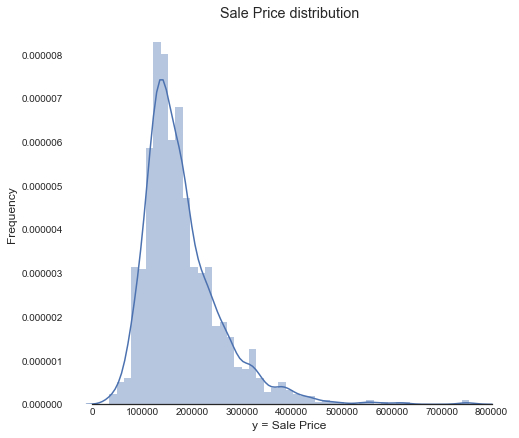

In [161]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
sns.distplot(y, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="y = Sale Price")
ax.set(title="Sale Price distribution")
sns.despine(trim=True, left=True)
plt.show()

Text(0,0.5,'weights')

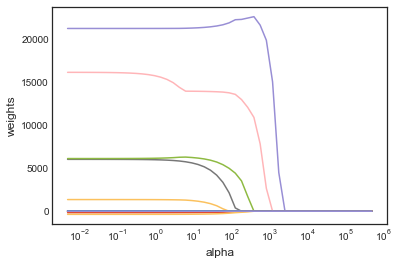

In [162]:
#lasso
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [163]:
lassocv = LassoCV(alphas=None, cv=10, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
trainscore=lassocv.score(X_train,y_train)
print(trainscore)
testscore=lassocv.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
coeff_used = np.sum(lassocv.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(lassocv.coef_, index=X.columns)

Alpha= 45.6109058072
0.782980130423
0.828711800456
mse =  1011510681.13
number of features used:  14
best model coefficients:


MSSubClass       -131.159546
LotArea             0.220058
OverallQual     21582.052289
OverallCond      4015.901384
Houseage         -292.986074
MasVnrArea         18.067147
BsmtFinSF1         10.386523
BsmtUnfSF          -0.000000
TotalBsmtSF         6.301290
1stFlrSF            6.235402
GrLivArea          40.325260
TotRmsAbvGrd      561.644769
Fireplaces       5658.494738
GarageCars      13892.454939
GarageArea          0.000000
WoodDeckSF         33.394354
OpenPorchSF         0.000000
dtype: float64

In [164]:
lasso = Lasso()
lasso.fit(X_train, y_train)

trainscore=lasso.score(X_train,y_train)
print(trainscore)
testscore=lasso.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
coeff_used = np.sum(lasso.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

0.78517879146
0.833169646409
mse =  1011472396.5
number of features used:  17
best model coefficients:


MSSubClass       -166.729795
LotArea             0.312013
OverallQual     21263.057051
OverallCond      6035.912485
Houseage         -362.207886
MasVnrArea         23.003090
BsmtFinSF1          9.382706
BsmtUnfSF          -2.764503
TotalBsmtSF         8.908628
1stFlrSF            4.973382
GrLivArea          39.961316
TotRmsAbvGrd     1356.853719
Fireplaces       6125.528031
GarageCars      16153.810340
GarageArea         -9.044466
WoodDeckSF         37.692121
OpenPorchSF         2.058358
dtype: float64

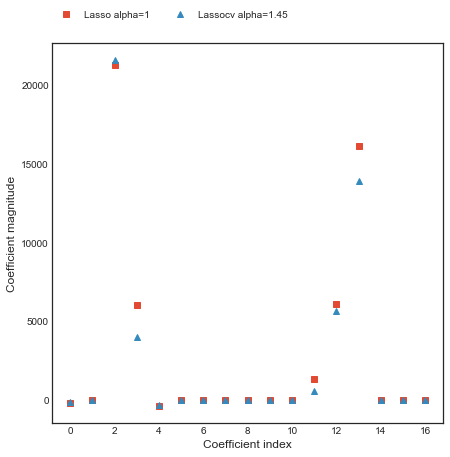

In [165]:
plt.figure(figsize = (7,7))
plt.plot(lasso.coef_,'s',label = "Lasso alpha=1")
plt.plot(lassocv.coef_,'^',label = "Lassocv alpha=1.45")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

Text(0,0.5,'weights')

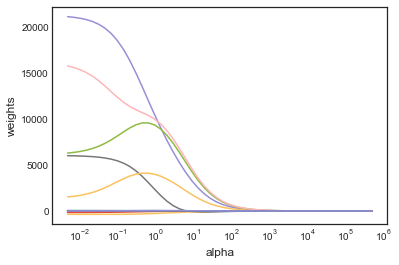

In [166]:
#Ridge
alphas = 10**np.linspace(6,-2,50)*0.5
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [167]:
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
print("Alpha=", ridgecv.alpha_)
trainscore=ridgecv.score(X_train,y_train)
print(trainscore)
testscore=ridgecv.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, ridge.predict(X_test)))
coeff_used = np.sum(ridgecv.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(ridgecv.coef_, index=X.columns)

Alpha= 0.214596713006
0.777230405401
0.828002701801
mse =  1010706944.34
number of features used:  17
best model coefficients:


MSSubClass       -101.733576
LotArea             0.256147
OverallQual     16365.879685
OverallCond      4839.358299
Houseage         -347.631812
MasVnrArea         26.523741
BsmtFinSF1          9.565018
BsmtUnfSF           0.713018
TotalBsmtSF        10.566447
1stFlrSF            9.651854
GrLivArea          26.993438
TotRmsAbvGrd     3792.704933
Fireplaces       9016.896013
GarageCars      11360.709605
GarageArea         17.552631
WoodDeckSF         37.542364
OpenPorchSF        30.687672
dtype: float64

In [168]:
ridge = Ridge()
ridge.fit(X_train, y_train)

trainscore=ridge.score(X_train,y_train)
print(trainscore)
testscore=ridge.score(X_test,y_test)
print(testscore)
print("mse = ",mean_squared_error(y_test, ridge.predict(X_test)))
coeff_used = np.sum(ridge.coef_!=0)
print ("number of features used: ", coeff_used)
print("best model coefficients:")
pd.Series(ridge.coef_, index=X.columns)

0.785178354844
0.833250785134
mse =  1010980462.15
number of features used:  17
best model coefficients:


MSSubClass       -166.655446
LotArea             0.311799
OverallQual     21241.648043
OverallCond      6034.464972
Houseage         -363.094855
MasVnrArea         23.010491
BsmtFinSF1          9.374697
BsmtUnfSF          -2.749529
TotalBsmtSF         8.908426
1stFlrSF            4.972057
GrLivArea          39.987976
TotRmsAbvGrd     1359.308240
Fireplaces       6124.089304
GarageCars      16016.553321
GarageArea         -8.649607
WoodDeckSF         37.700395
OpenPorchSF         2.066790
dtype: float64

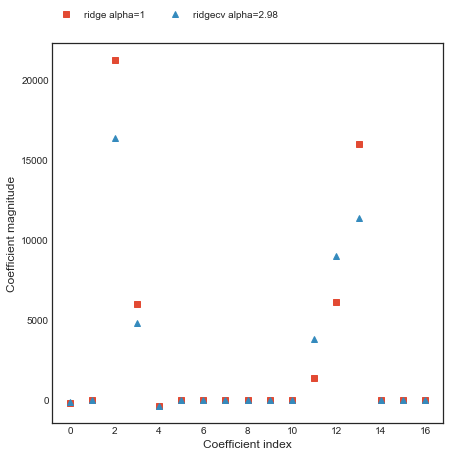

In [169]:
plt.figure(figsize = (7,7))
plt.plot(ridge.coef_,'s',label = "ridge alpha=1")
plt.plot(ridgecv.coef_,'^',label = "ridgecv alpha=2.98")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

In [170]:
from sklearn.linear_model import ElasticNet

els_reg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
els_reg.fit(X_train,y_train)
print('Accuracy of training data :',np.round(els_reg.score(X_train,y_train)*100,2))
print('Accuracy of testing data :',np.round(els_reg.score(X_test,y_test)*100,2))
pd.Series(els_reg.coef_, index=X.columns)

Accuracy of training data : 77.23
Accuracy of testing data : 83.65


MSSubClass       -157.201439
LotArea             0.261775
OverallQual     13134.812776
OverallCond      4986.068831
Houseage         -533.103653
MasVnrArea         27.466248
BsmtFinSF1          8.804682
BsmtUnfSF           0.245266
TotalBsmtSF        11.719379
1stFlrSF            3.950776
GrLivArea          51.848864
TotRmsAbvGrd      620.575435
Fireplaces       3235.471619
GarageCars       3296.507525
GarageArea         32.069009
WoodDeckSF         39.721385
OpenPorchSF        14.012332
dtype: float64

In [171]:
predict_els = els_reg.predict(X_test)
from sklearn import metrics
print('mean square error for ElasticNet for Test Data:')
np.round(metrics.mean_squared_error(y_test,predict_els),2)

mean square error for ElasticNet for Test Data:


991161816.96000004

In [172]:
from sklearn.linear_model import ElasticNetCV
els_regcv = ElasticNetCV(alphas=alphas, cv=10, normalize=True)
els_regcv.fit(X_train,y_train)
print(els_regcv.alpha_)
print(els_regcv.l1_ratio_)
print('Accuracy of training data :',np.round(els_regcv.score(X_train,y_train)*100,2))
print('Accuracy of testing data :',np.round(els_regcv.score(X_test,y_test)*100,2))
pd.Series(els_regcv.coef_, index=X.columns)

0.005
0.5
Accuracy of training data : 67.16
Accuracy of testing data : 70.91


MSSubClass       -25.596745
LotArea            0.190208
OverallQual     6937.400813
OverallCond      767.714395
Houseage        -196.330758
MasVnrArea        24.786799
BsmtFinSF1         7.387959
BsmtUnfSF          3.787896
TotalBsmtSF       11.271258
1stFlrSF          12.573217
GrLivArea         14.080788
TotRmsAbvGrd    3263.125261
Fireplaces      7749.223072
GarageCars      8232.621560
GarageArea        25.360074
WoodDeckSF        26.844685
OpenPorchSF       50.052778
dtype: float64

In [173]:
predict_elscv = els_regcv.predict(X_test)
print('mean square error for ElasticNetCV for Test Data:')
np.round(metrics.mean_squared_error(y_test,predict_elscv),2)

mean square error for ElasticNetCV for Test Data:


1763655320.96

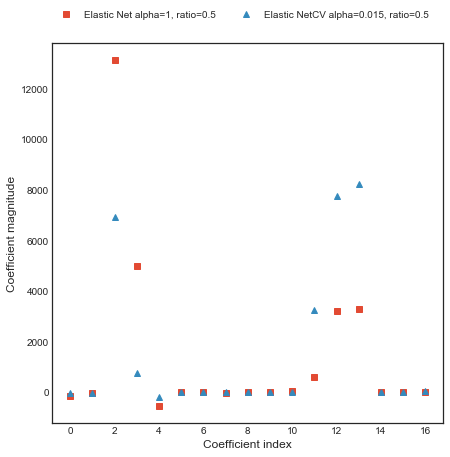

In [174]:
plt.figure(figsize = (7,7))
plt.plot(els_reg.coef_,'s',label = "Elastic Net alpha=1, ratio=0.5")
plt.plot(els_regcv.coef_,'^',label = "Elastic NetCV alpha=0.015, ratio=0.5")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend(ncol=2,loc=(0,1.05))
plt.show()

In [175]:
### PCA

In [176]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [177]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.fit_transform(scale(X_test))
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,-0.046663,0.115425,0.184038,-0.668492,0.061230,-0.159396
1,0.142983,0.106462,0.312178,0.295037,-0.039370,-0.006871
2,0.345983,0.022643,-0.019291,-0.146091,-0.195247,0.109294
3,-0.091203,0.206068,0.315801,0.249391,-0.434152,0.470699
4,-0.235046,0.367589,0.264670,0.193832,0.059546,0.027395


(-1, 18.899999999999999)

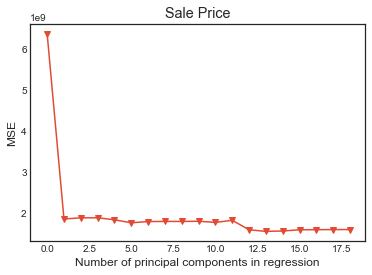

In [178]:
from sklearn import model_selection
# 10-fold CV, with shuffle
n = len(X_train_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 18 principle components, adding one component at the time.
for i in np.arange(1, 19):
    score = -1*model_selection.cross_val_score(regr, X_train_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sale Price')
plt.xlim(xmin=-1)

(-1, 18.899999999999999)

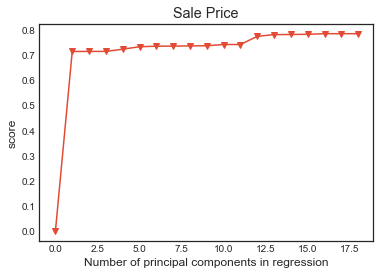

In [179]:
from sklearn import model_selection
# 10-fold CV, with shuffle
n = len(X_train_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

clf = LinearRegression()
accuracy = []

# Calculate score with only the intercept (no principal components in regression)
clf.fit(np.ones((n,1)), y_train.ravel())
acc_score = clf.score(np.ones((n,1)), y_train.ravel())
accuracy.append(acc_score)

# Calculate score using CV for the 18 principle components, adding one component at the time.
for i in np.arange(1, 19):
    clf.fit(X_train_reduced[:,:i], y_train.ravel())
    acc_score = clf.score(X_train_reduced[:,:i], y_train.ravel())
    accuracy.append(acc_score)
    
# Plot results    
plt.plot(accuracy, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('score')
plt.title('Sale Price')
plt.xlim(xmin=-1)

In [180]:
clf.fit(X_train_reduced[:,:2], y_train.ravel())
print(-1*model_selection.cross_val_score(regr, X_train_reduced[:,:2], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_train_reduced[:,:2], y_train.ravel()))

1887310952.05
0.714752529357


In [181]:
clf.fit(X_train_reduced[:,:12], y_train.ravel())
print(-1*model_selection.cross_val_score(regr, X_train_reduced[:,:12], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_train_reduced[:,:12], y_train.ravel()))

1595616365.98
0.774757646268


In [182]:
clf.fit(X_test_reduced[:,:2], y_test.ravel())
print(-1*model_selection.cross_val_score(regr, X_test_reduced[:,:2], y_test.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean())
print(clf.score(X_test_reduced[:,:2], y_test.ravel()))

1335950151.79
0.785281551503


In [183]:
### We see that the smallest cross-validation error occurs when M=2 components are used. This is barely fewer than M=2 , which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.

In [184]:
### Random Forest

In [185]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [186]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [187]:
rfr_model(X,y)

array([-19539.35769557, -20064.03580907, -18351.55831582, -21311.14250306,
       -22384.97243774, -16572.07723279, -18162.27736823, -18789.05232182,
       -21771.88053681, -19223.32718743])

In [188]:
from sklearn import ensemble

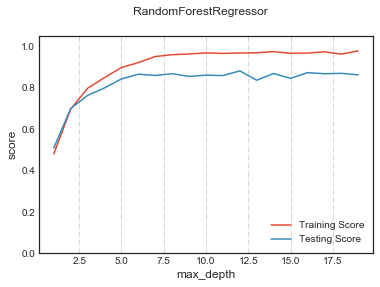

In [189]:
maxdepths=range(1,20)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
testing_scores=[]
training_scores=[]
for max_depth in maxdepths:
    regr=ensemble.RandomForestRegressor(max_depth=max_depth)
    regr.fit(X_train,y_train)
    training_scores.append(regr.score(X_train,y_train))
    testing_scores.append(regr.score(X_test,y_test))
ax.plot(maxdepths,training_scores,label="Training Score")
ax.plot(maxdepths,testing_scores,label="Testing Score")
ax.set_xlabel("max_depth")
ax.set_ylabel("score")
ax.legend(loc="lower right")
ax.set_ylim(0,1.05)
plt.suptitle("RandomForestRegressor")

plt.grid(axis='x',linestyle='-.')
plt.show()

In [190]:
regr=ensemble.RandomForestRegressor(max_depth=3)
regr.fit(X_train,y_train)
print(regr.score(X_train,y_train))
print(regr.score(X_test,y_test))

0.792016728331
0.765626026146


In [191]:
### SVM

In [192]:
from sklearn.svm import SVR

In [193]:
regressor=SVR(kernel='linear',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

0.703560915232
0.789945199361


In [194]:
regressor=SVR(kernel='poly',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

0.688809746738
0.784258090468


In [195]:
regressor=SVR(kernel='rbf',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

-0.0650011484892
-0.0741932625642


In [196]:
regressor=SVR(kernel='sigmoid',degree=1)

regressor.fit(X_train,y_train)
print(regressor.score(X_train,y_train))
pred=regressor.predict(X_test)
print(regressor.score(X_test,y_test))

-0.0650188361976
-0.0741932710866
